In [1]:
#reference:III_teacher-https://github.com/Elwing-Chou
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

#波斯頓房價回歸問題
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df['target'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


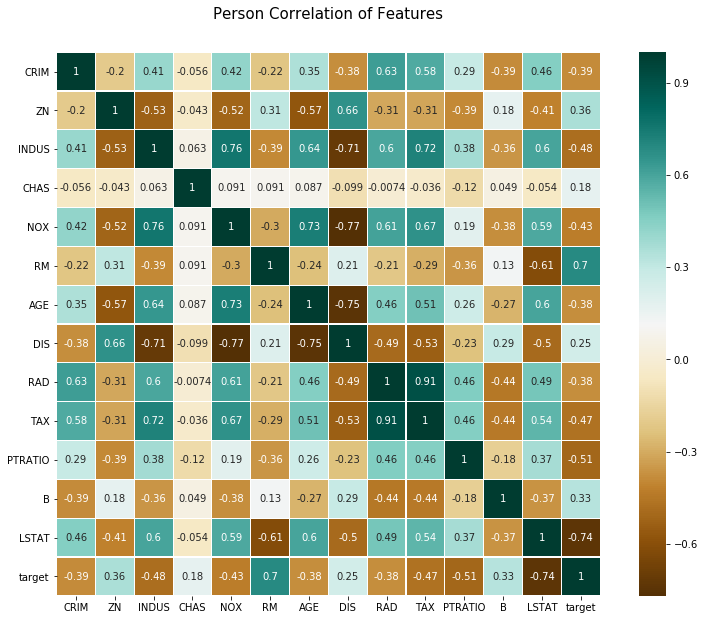

In [3]:
plt.figure(figsize=(14,10))
plt.title('Person Correlation of Features', y= 1.05, size= 15)
sns.heatmap(df.astype(float).corr(), cmap = "BrBG", linewidths=0.1,square=True, linecolor='White',annot=True )

In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

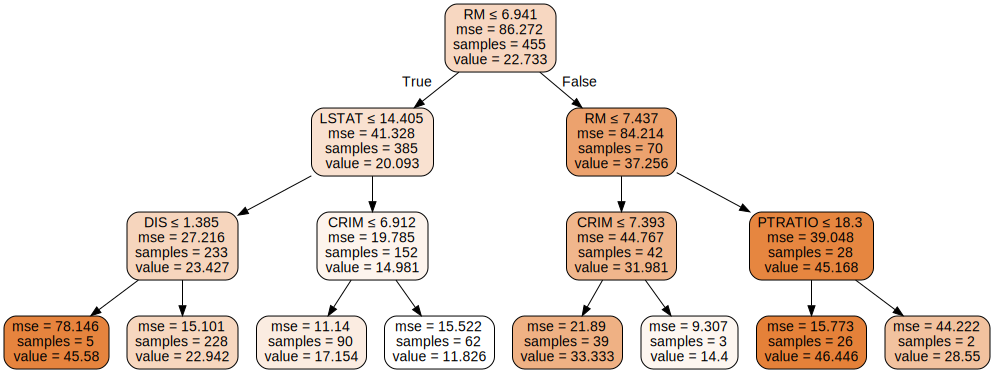

In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(boston['data'], boston['target'],test_size=0.1)


from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(data_train, target_train)

from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(regr, out_file=None, feature_names= boston.feature_names, filled=True, rounded=True, special_characters=True)
gragh = graphviz.Source(dot_data)
gragh

In [10]:
#觀察預測差異，使用numpy來實現list直接相減
import numpy as np
predict = regr.predict(data_test)
print("實際價格",target_test)
print("預測價格",predict)
interval = np.subtract(predict, target_test)
print("差異",interval)

實際價格 [23.3  9.7 15.4 19.4 14.3  8.1 12.7 31.5 28.2 20.  19.5 21.  20.4 14.5
 33.1 20.8 19.4 25.2 23.8 19.4 23.4 14.4 31.2 15.1 17.9 23.1 11.9  7.2
 17.1 33.3 10.5 42.8 18.4 23.2  9.5 12.6 24.3 20.1 36.1 13.8 20.9 21.7
 14.9 23.9 22.3 19.3 27.9 21.2 17.4 17.5 45.4]
預測價格 [22.94166667 11.82580645 11.82580645 17.15444444 17.15444444 17.15444444
 11.82580645 33.33333333 22.94166667 22.94166667 22.94166667 22.94166667
 17.15444444 22.94166667 33.33333333 22.94166667 17.15444444 22.94166667
 22.94166667 22.94166667 22.94166667 17.15444444 22.94166667 11.82580645
 11.82580645 22.94166667 11.82580645 11.82580645 11.82580645 33.33333333
 11.82580645 28.55       22.94166667 22.94166667 11.82580645 11.82580645
 22.94166667 22.94166667 33.33333333 11.82580645 22.94166667 17.15444444
 11.82580645 22.94166667 22.94166667 17.15444444 22.94166667 22.94166667
 17.15444444 17.15444444 46.44615385]
差異 [ -0.35833333   2.12580645  -3.57419355  -2.24555556   2.85444444
   9.05444444  -0.87419355   1.83333333

In [11]:
from sklearn.metrics import r2_score
#https://zh.wikipedia.org/wiki/%E5%86%B3%E5%AE%9A%E7%B3%BB%E6%95%B0
#r2=1 , res=0 代表猜的數字與真正數字都依樣
#r2=0 , res=1 代表猜的數字都是平均值
print("訓練資料r2 score:",r2_score(target_train,regr.predict(data_train)))
print("測試資料r2 score:",r2_score(target_test,regr.predict(data_test)))

訓練資料r2 score: 0.8171174980961975
測試資料r2 score: 0.7642668374394408
